## Bank Marketing Dataset Analysis

This jupyter notebook performs a analysis of a bank marketing dataset that can be found in the following kaggle link: [**Bank Marketing Dataset**](https://www.kaggle.com/janiobachmann/bank-marketing-dataset).

To enhance the final product of the analysis different other kaggle sources were examined and incorporated. Therefore credit is due to the following authors:
- [Bank Marketing Campaign || Opening a Term Deposit by Janio Martinez Bachmann](https://www.kaggle.com/code/janiobachmann/bank-marketing-campaign-opening-a-term-deposit)
- [Bank Marketing Analysis by Aleksandra Deis](https://www.kaggle.com/code/aleksandradeis/bank-marketing-analysis)
- [Bank Customer Segmentation by Rhythm Shah](https://www.kaggle.com/code/rhythmshah11/bank-customer-segmentation)

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sq
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from plotly import tools
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

Read the dataset

In [204]:
file_path = "bank.csv"
df = pd.read_csv(file_path)
print(df.head())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


Description of the dataset

In [205]:
print("Bank marketing dataset consists of {rows} rows.".format(rows = len(df)))
df.describe()

Bank marketing dataset consists of 11162 rows.


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Verify null values

In [206]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

### Information on the y target variable
Fairly balanced dataset so we can use accuracy as a measure

<Axes: title={'center': 'Information on Deposit Suscriptions'}, ylabel='count'>

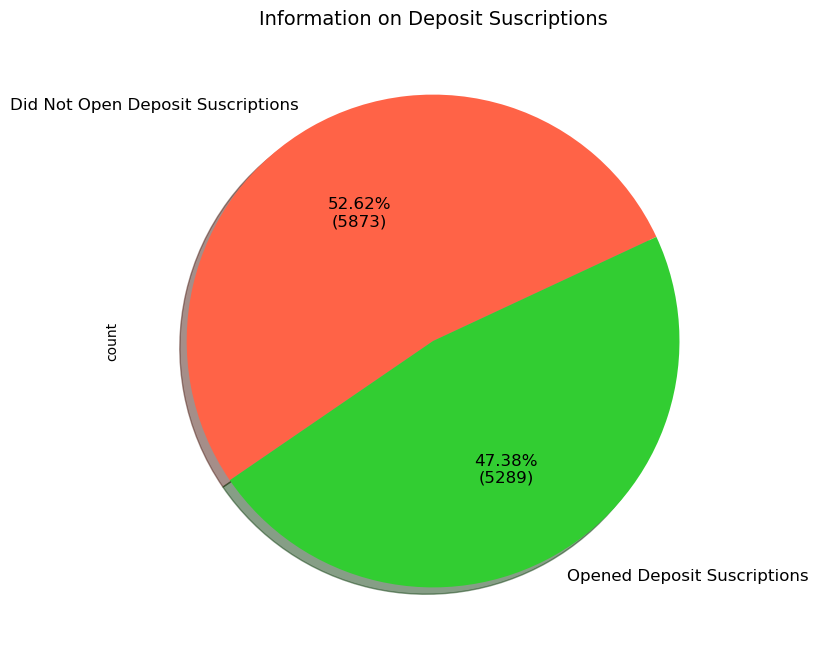

In [207]:
y_counts = df["deposit"].value_counts()
f, ax = plt.subplots(figsize=(8,8))

colors = ["tomato", "limegreen"]
labels ="Did Not Open Deposit Suscriptions", "Opened Deposit Suscriptions"

plt.title('Information on Deposit Suscriptions', fontsize=14)

y_counts.plot.pie(
  autopct=lambda pct: '{:.2f}%\n({})'.format(pct, int(round(pct*sum(y_counts)/100.0))),
  ax=ax, shadow=True, colors=colors, labels=labels, fontsize=12, startangle=25
)

# Adapted of Janio Martinez Bachmann's code

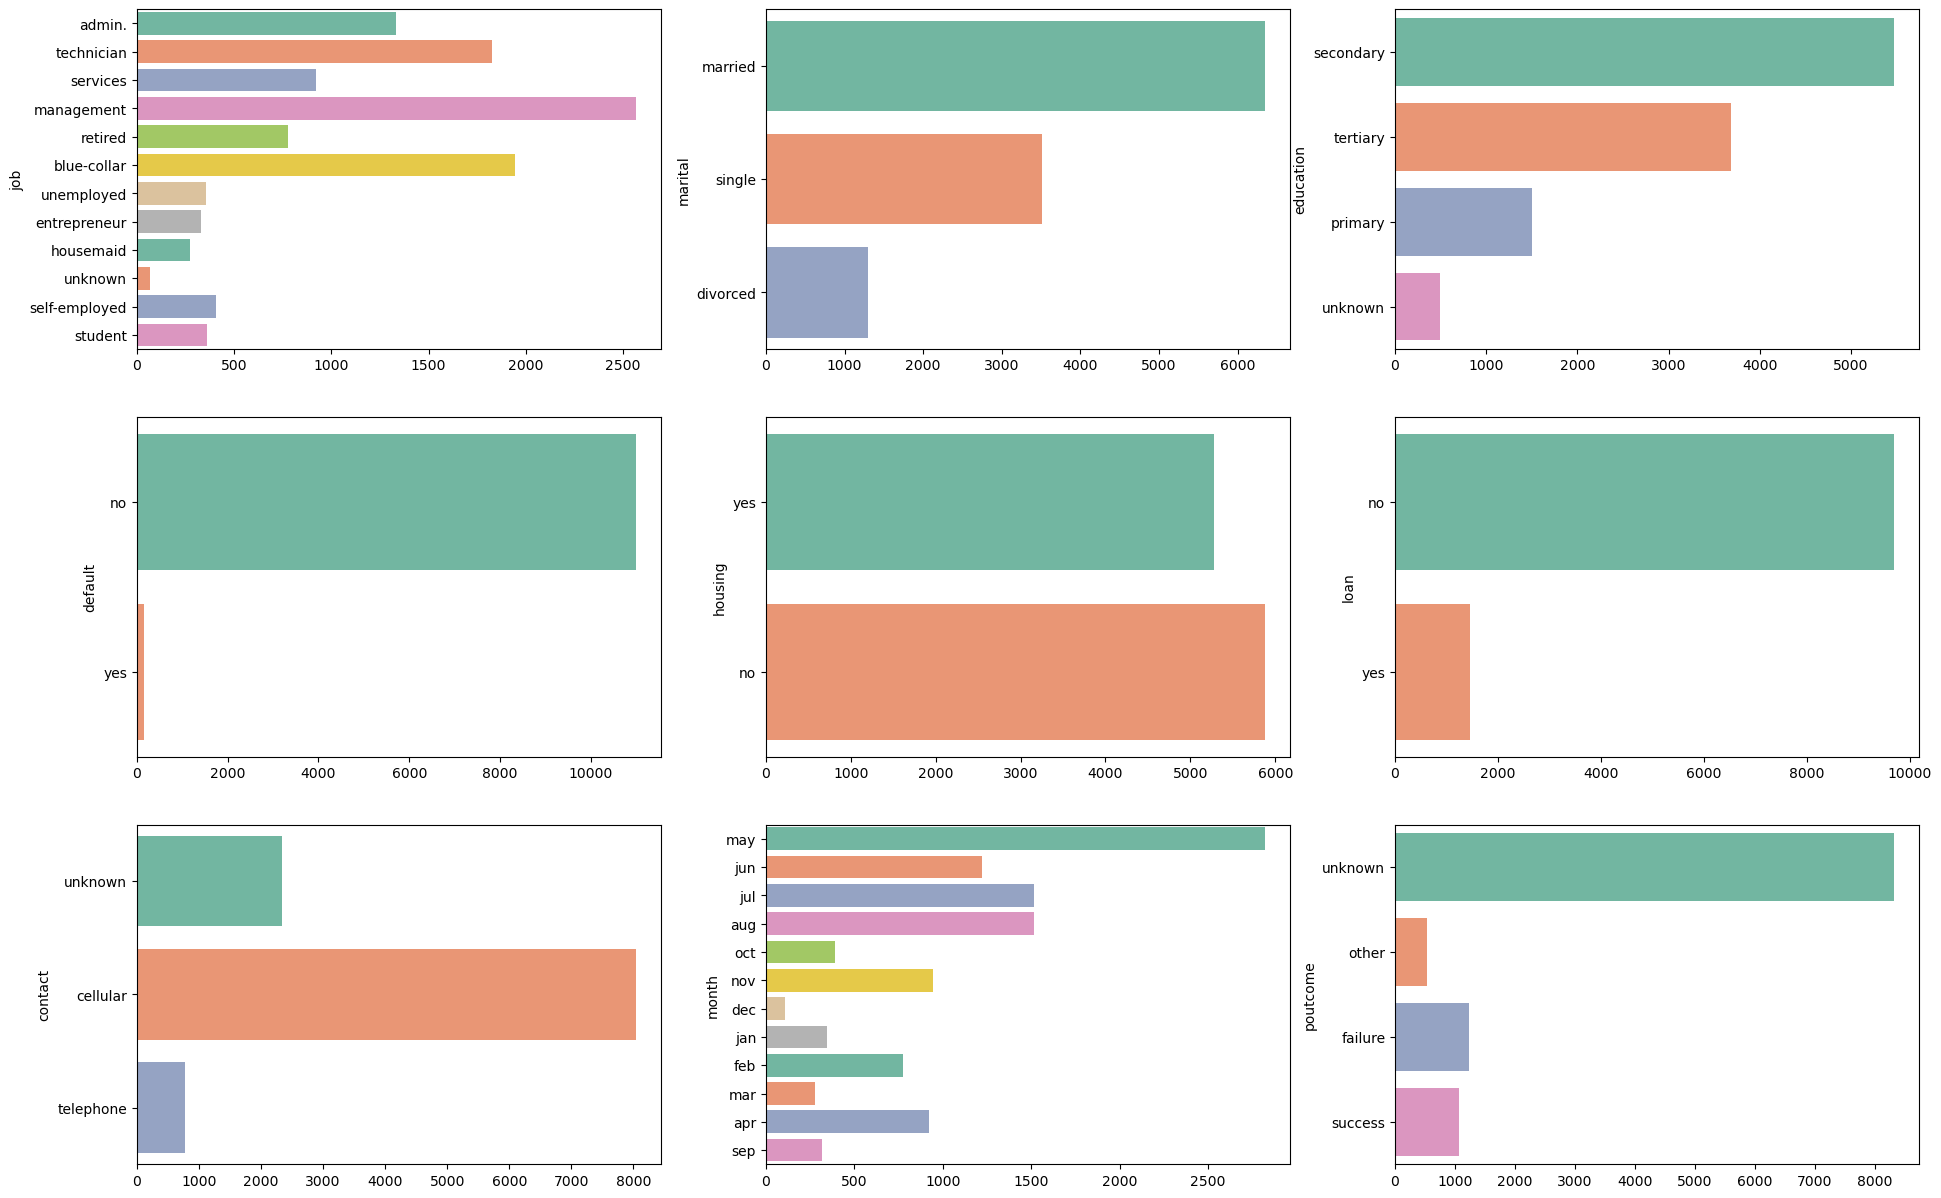

In [208]:
# Distribution Categorical Data
categorical_columns = df.columns[df.dtypes == 'object']
categorical_columns = categorical_columns.drop("deposit")

fig, ax = plt.subplots(3, 3, figsize=(23, 15))
for variable, subplot in zip(categorical_columns, ax.flatten()):
  sns.countplot(y=df[variable], ax=subplot, hue=df[variable], palette="Set2", legend=False)
  subplot.set(xlabel=None)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

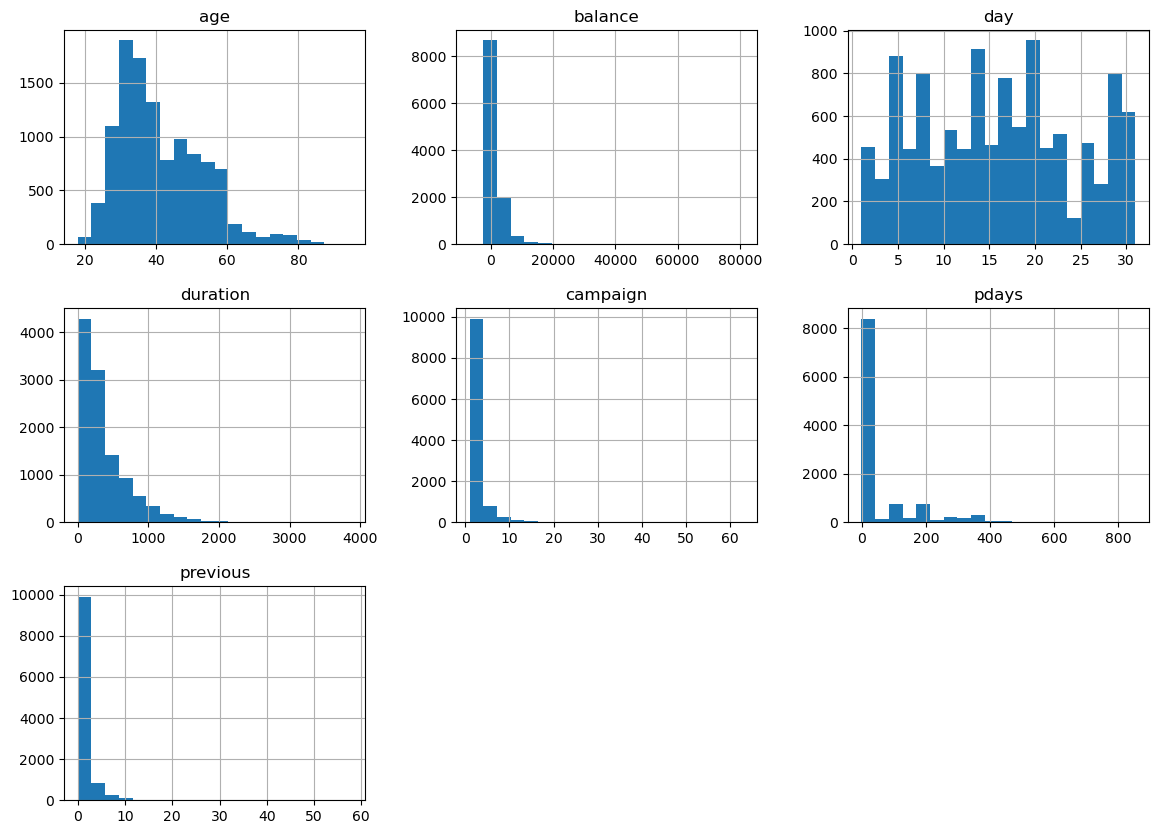

In [209]:
# Distribution Numerical Data
df.hist(bins=20, figsize=(14,10))

Text(0.5, 1.0, 'Number of Occupations')

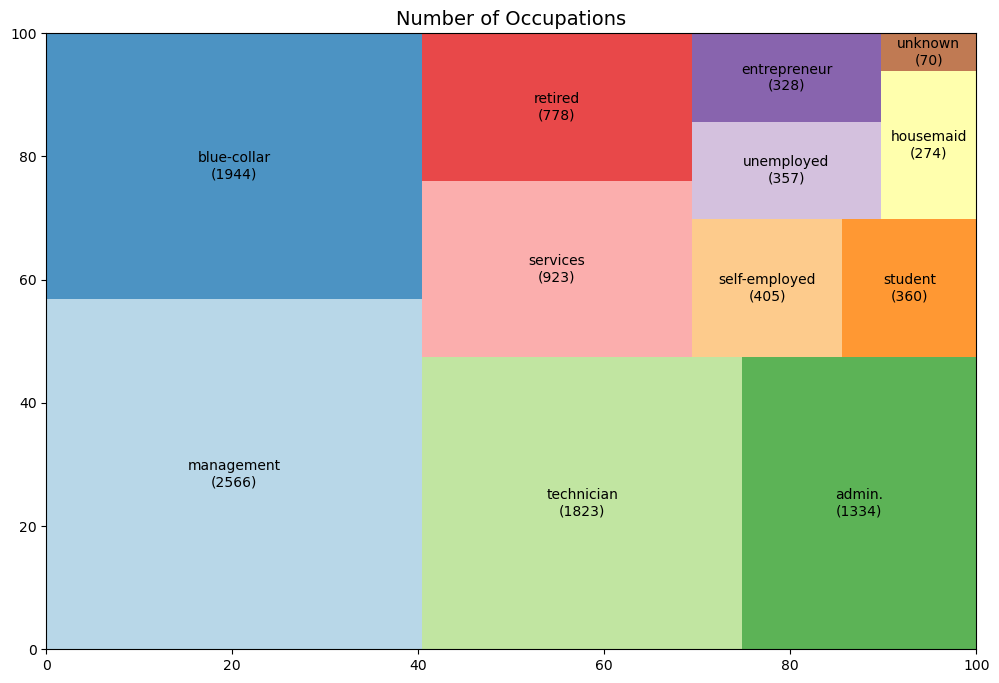

In [210]:
job_value_counts = df['job'].value_counts()
plt.figure(figsize=(12,8))
sq.plot(sizes=job_value_counts.values, alpha=.8, color=sns.color_palette("Paired", job_value_counts.size),
  label=[f"{job}\n({count})" for job, count in zip(job_value_counts.index, job_value_counts.values)], 
)
plt.title('Number of Occupations', fontsize=14)

### Distribution of Ages by Occupation

Usually retired people are older.
Student people are younger. 

In [211]:
# Now let's see which occupation tended to have more balance in their accounts

suscribed_df = df.loc[df["deposit"] == "yes"]

occupations = df["job"].unique().tolist()

ages_by_job = {job: suscribed_df["age"].loc[suscribed_df["job"] == job].values for job in occupations}

occupations = ages_by_job.keys()
ages = ages_by_job.values()

colors = [
    'rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 
    'rgba(255, 65, 54, 0.5)',  'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
    'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)', 'rgba(174, 229, 56, 0.5)', 
    'rgba(229, 56, 56, 0.5)', 'rgba(54, 162, 235, 0.5)', 'rgba(255, 99, 132, 0.5)'
]


traces = []

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(autorange=True,showgrid=True,zeroline=True,dtick=5,gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(l=40,r=30,b=80,t=100),
    plot_bgcolor='rgb(251,251,251)',
    paper_bgcolor='rgb(224,255,246)',
    showlegend=False
)


fig = go.Figure(data=traces, layout=layout)
iplot(fig)

# Based on Janio Martinez Bachmann's code

In [ ]:
df_copy = df.copy()
df_copy["balance_status"] = np.nan
df_copy["balance_status"] = df_copy["balance_status"].astype(object)

lst = [df_copy]
for col in lst:
  col.loc[col["balance"] < 0, "balance_status"] = "negative"
  col.loc[(col["balance"] >= 0) & (col["balance"] <= 30000), "balance_status"] = "low"
  col.loc[(col["balance"] > 30000) & (col["balance"] <= 40000), "balance_status"] = "middle"
  col.loc[col["balance"] > 40000, "balance_status"] = "high"

negative = df_copy["balance"].loc[df_copy["balance_status"] == "negative"].values.tolist()
low = df_copy["balance"].loc[df_copy["balance_status"] == "low"].values.tolist()
middle = df_copy["balance"].loc[df_copy["balance_status"] == "middle"].values.tolist()
high = df_copy["balance"].loc[df_copy["balance_status"] == "high"].values.tolist()

# Get the average by occupation in each balance category
job_balance = df_copy.groupby(['job', 'balance_status'])['balance'].mean().reset_index()
balance_status_order = ['negative', 'low', 'middle', 'high']
job_balance['balance_status'] = pd.Categorical(job_balance['balance_status'], categories=balance_status_order, ordered=True)
job_balance = job_balance.sort_values(['job', 'balance_status'])

fig = px.bar(
    job_balance, 
    x='job', 
    y='balance',
    category_orders={"balance_status": balance_status_order},
    color='balance_status', 
    barmode='group',
    title='Mean Balance in Account by Job Occupation',
    labels={'balance': 'Mean Balance (€)', 'job': 'Job Occupation', 'balance_status': 'Balance Category'},
    color_discrete_map={
        'negative': 'rgb(246, 46, 46)', 
        'low': 'rgb(246, 97, 46)', 
        'middle': 'rgb(246, 179, 46)', 
        'high': 'rgb(46, 246, 78)'
    }
)

# Customize the layout
fig.update_layout(
  legend_title_text='Balance Category',
  xaxis_tickangle=-45,
  yaxis_title='Mean Balance (€)',
  font=dict(size=12),
  legend=dict(font=dict(size=12)),
)

fig.show()

# Changed from Janio Martinez Bachmann's code

      age          job  marital education default  balance housing loan  \
8208   52  blue-collar  married   primary      no    66653      no   no   

       contact  day month  duration  campaign  pdays  previous poutcome  \
8208  cellular   14   aug       109         3     -1         0  unknown   

     deposit  
8208      no  
66653.0
